In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import suptitle
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import plotly.express as px

In [5]:
df = pd.read_csv('fetal_health.csv', delimiter=',')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [8]:
#dropping unnecessary columns 
df2= df.drop(['histogram_width', 'histogram_min','histogram_max','histogram_number_of_peaks', 'histogram_number_of_zeroes','histogram_mode', 'histogram_mean','histogram_median','histogram_variance', 'histogram_tendency'], axis=1)

In [9]:
df2.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,3.000000


In [10]:
df2['fetal_health'].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

In [11]:
df2['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

<AxesSubplot:ylabel='Frequency'>

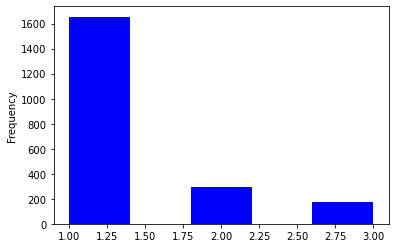

In [12]:
df2['fetal_health'].plot.hist(bins=5, color='blue')

<AxesSubplot:>

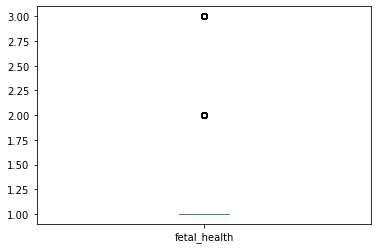

In [13]:
df2['fetal_health'].plot.box()
#df.plot.box(y=['fetal_health'])

In [14]:
df2['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

Text(0.5, 0.98, 'Fetal Health Classification')

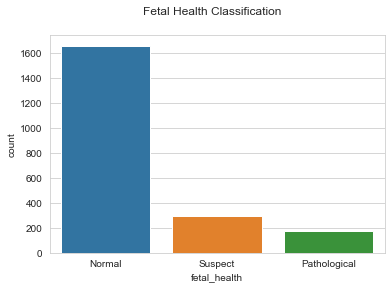

In [15]:
# Historgam on fetal health
sns.set_style(style='whitegrid')
countplot = sns.countplot(x='fetal_health', data=df)
#countplot.set_xlabel("Fetal Health")
countplot.set_xticklabels(["Normal", "Suspect", "Pathological"])
suptitle("Fetal Health Classification")

In [41]:
#polar = px.line_polar(df, r='fetal_health', theta='fetal_health', color='fetal_health', line_close=True, width=800, height=500)

#polar.show()

C:\Users\etcat\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fetal_health', ylabel='Density'>

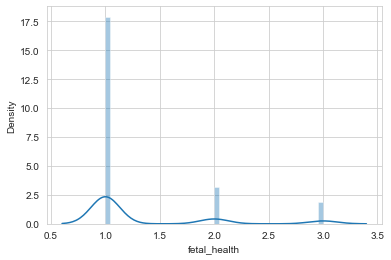

In [16]:
sns.set_style('whitegrid')
sns.distplot(df['fetal_health'])

In [14]:
#ctrl + /
# g = sns.FacetGrid(df, #the dataframe to pull from
#                   row= "fetal_health", #define the column for each subplot row to be differentiated by
#                   hue="prolongued_decelerations", #define the column for each subplot color to be differentiated by
#                   aspect=10, #aspect * height = width
#                   height=1.5, #height of each subplot
#                   palette=['#4285F4','#EA4335','#FBBC05','#34A853'] #google colors
#                  )

# g.map(sns.kdeplot, "fetal_health", shade=True, alpha=1, lw=1.5, bw=0.2)
# g.map(sns.kdeplot, "prolongued_decelerations", lw=4, bw=0.2)
# g.map(plt.axhline, y='prolongued_decelerations', lw=4)

#def label(x, color, label):
   # ax = plt.gca()
   # ax.text(0, .2,
    #       label,
   #        fontweight="bold", color=color, size=20,
       #    ha="left", va="center",
      #     transform=ax.transAxes)
#g.map(label, "x")

In [92]:
#g = sns.FacetGrid(df, #the dataframe to pull from
         #         row="fetal_health", #define the column for each subplot row to be differentiated by
        #          hue="fetal_health", #define the column for each subplot color to be differentiated by
         #         aspect=10, #aspect * height = width
         #         height=1.5, #height of each subplot
         #         palette=['#4285F4','#EA4335','#FBBC05','#34A853'] #google colors
               #  )

#g.map(sns.kdeplot, df["fetal_health"], shade=True, alpha=1, lw=1.5, bw=0.2)
#g.map(sns.kdeplot, df["fetal_health"], lw=4, bw=0.2)
#g.map(plt.axhline, y=0, lw=4)

In [17]:
corr = df2.corr()
corr

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,0.426146


<AxesSubplot:>

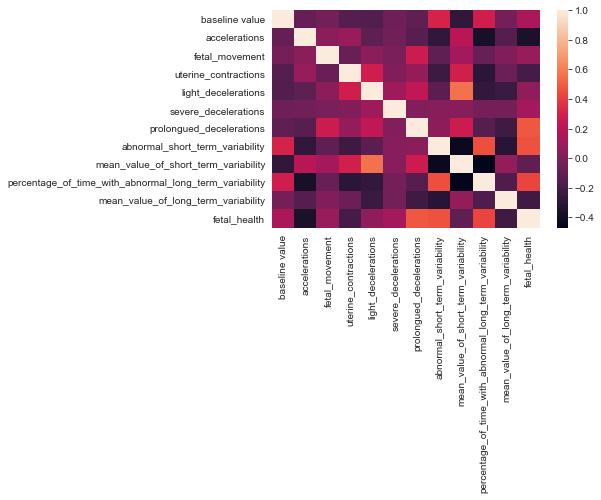

In [18]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

<AxesSubplot:>

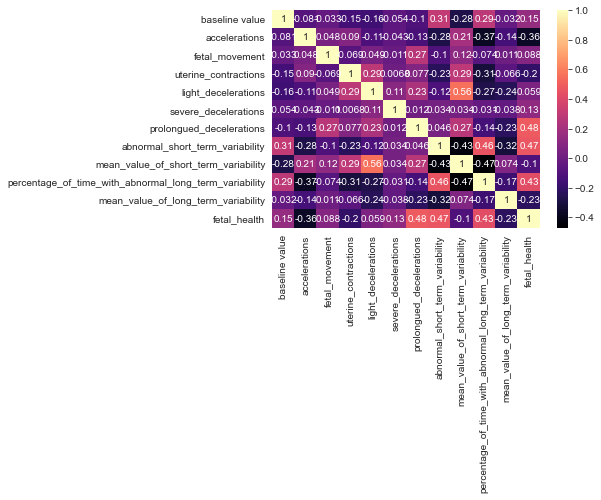

In [19]:
sns.heatmap(df2.corr(), annot=True, cmap='magma')

<AxesSubplot:>

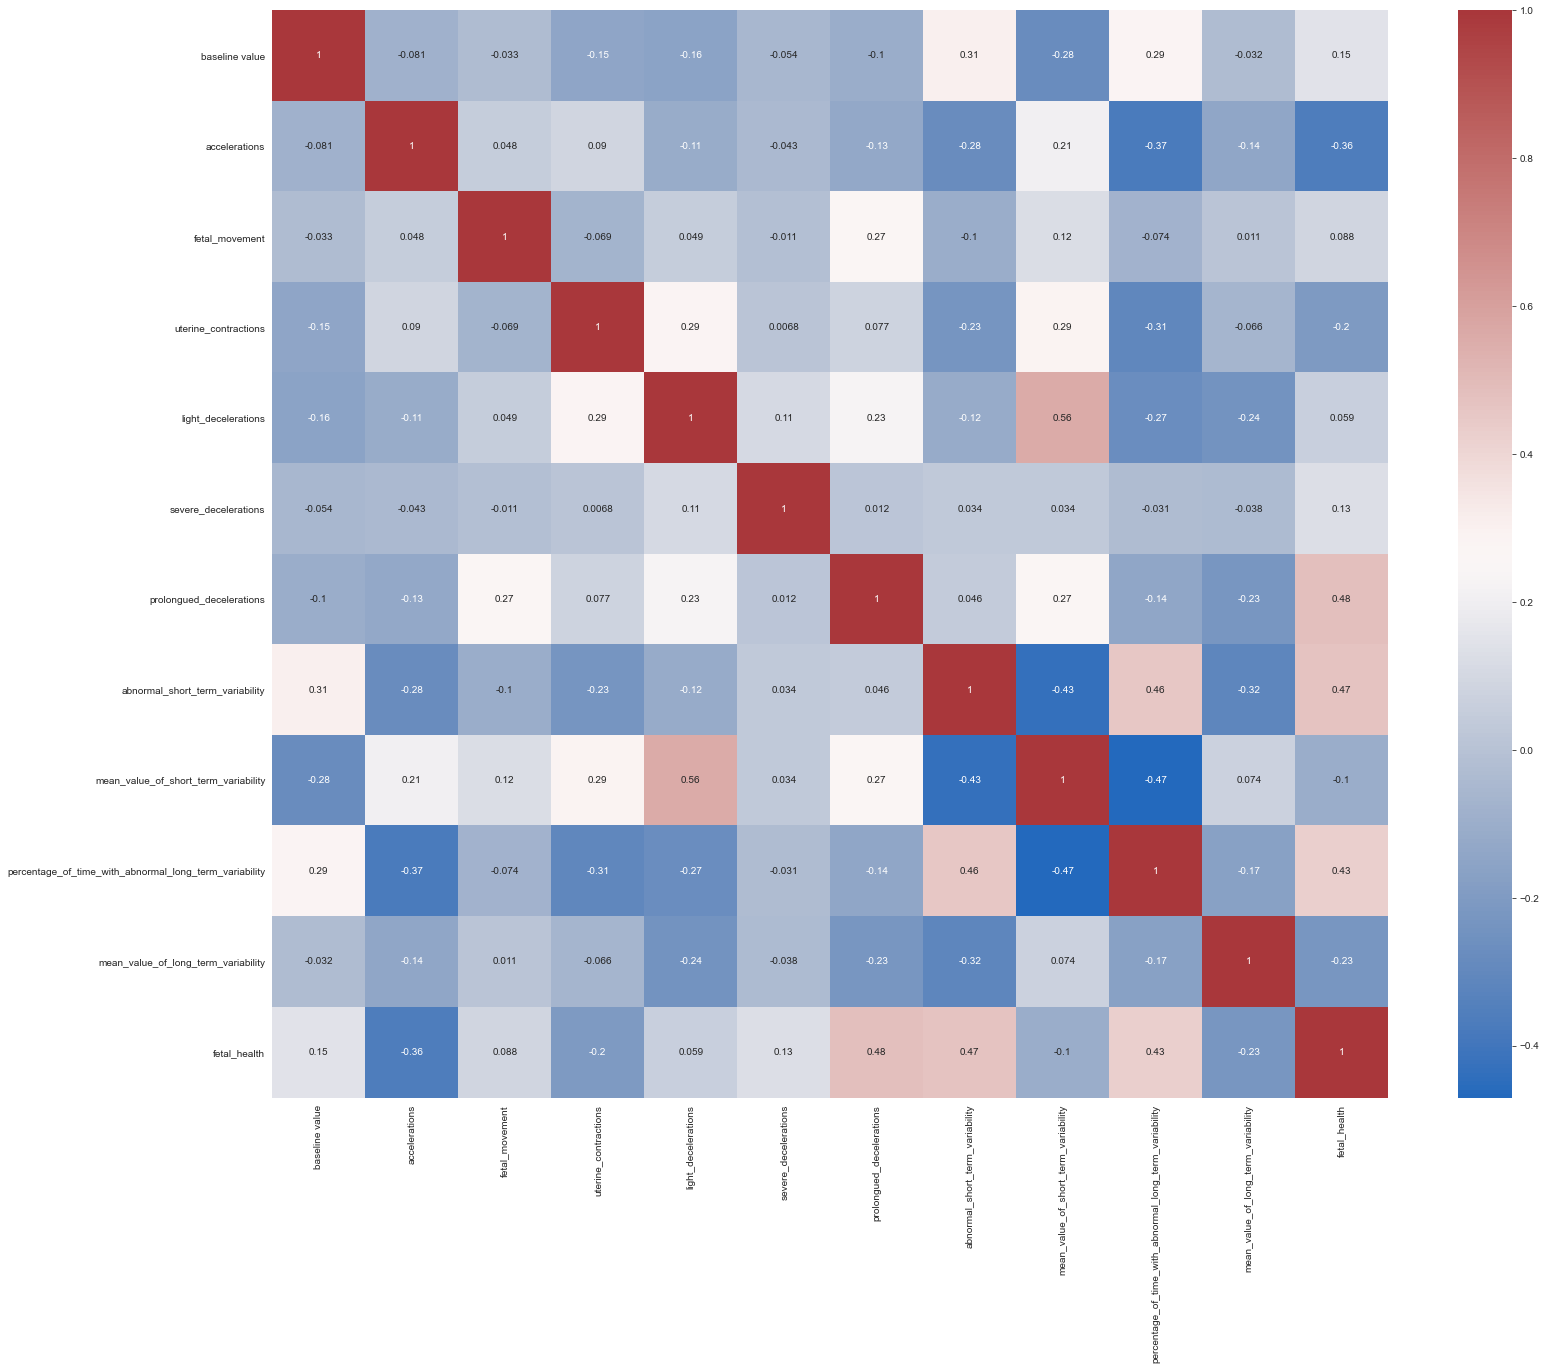

In [21]:
#correlation matrix

corr_df2=df2.corr()
fig, axes = plt.subplots(figsize=(25,20))
sns.heatmap(corr_df2, annot=True, cmap = 'vlag')

In [22]:
corr_df2 = corr_df2['fetal_health'].sort_values(ascending=False).head(20).to_frame()

#color = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

corr_table = corr_df2.style.background_gradient(cmap='vlag')
corr_table
#looking at prolongued_decelerations, abnormal_short_term_variability, and percent of time with abnormal long term variability correlated to fetal health.

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
light_decelerations,0.058870
mean_value_of_short_term_variability,-0.103382
uterine_contractions,-0.204894


In [41]:
#df.hist(figsize= (30, 30), color = "#5F9EA0")

In [31]:
#sns.pairplot(df, size=6)

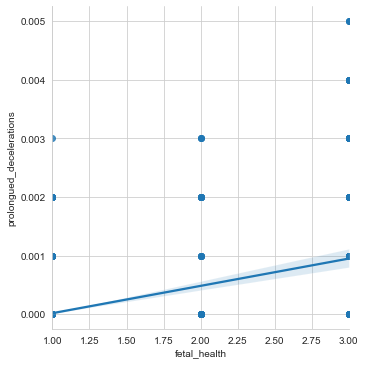

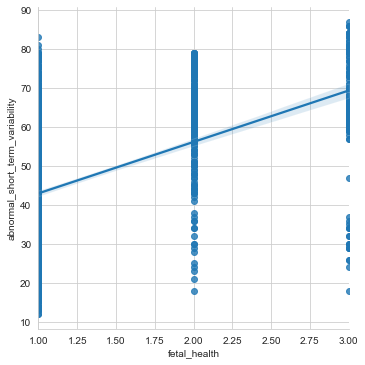

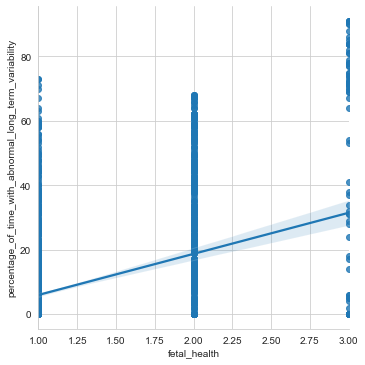

In [23]:
sns.lmplot(x ='fetal_health', y = 'prolongued_decelerations', data = df2)
sns.lmplot(x ='fetal_health', y = 'abnormal_short_term_variability', data = df2)
sns.lmplot(x ='fetal_health', y = 'percentage_of_time_with_abnormal_long_term_variability', data = df2)

In [35]:
#KNN

#feature selection
column = ['prolongued_decelerations', 'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability']

X = pd.DataFrame(df2.drop(['fetal_health'], axis = 1), columns = column)

y = df2['fetal_health']


In [30]:
#splitting the model into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 3), (638, 3), (1488,), (638,))

In [31]:
scaleX = StandardScaler()
X_train = scaleX.fit_transform(X_train)
X_test = scaleX.transform(X_test)

In [32]:
#splitting the model into test and train sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [33]:
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [34]:
predict = knn.predict(X_test)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         1.0       0.91      0.96      0.93       494
         2.0       0.67      0.59      0.63        86
         3.0       0.95      0.72      0.82        58

    accuracy                           0.89       638
   macro avg       0.85      0.76      0.80       638
weighted avg       0.88      0.89      0.88       638



In [ ]:

#dtc = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', random_state = 0)
#dtc.fit(X_train, y_train)

In [ ]:
#sources
# https://www.kaggle.com/pariaagharabi/step-by-step-fetal-health-prediction-99-detailed
# https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16
# https://pub.towardsai.net/fully-explained-logistic-regression-with-python-f4a16413ddcd
# https://towardsdatascience.com/ml-step-by-step-using-knn-algorithm-to-classify-spotify-songs-into-playlists-8c7892428371